In [30]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [31]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\greengram_u_97-19_u.csv")
df = df.drop(columns=['latitude','longitude'])
df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [32]:
df.columns

Index(['year', 'stl1_1', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl3_2',
       'stl4_1', 'stl4_2', 'swvl1_1', 'swvl1_2', 'swvl2_1', 'swvl2_2',
       'swvl3_1', 'swvl3_2', 'swvl4_1', 'swvl4_2', 'ssr_1', 'ssr_2',
       'DistrictName', 'Yield(Tonnes/Hectare)', 'rain_1', 'rain_2', 'tmax_1',
       'tmax_2', 'tmin_1', 'tmin_2', 'countrain_1', 'countrain_2', 'u10_3',
       'u10_4', 'v10_3', 'v10_4', 'rh_3', 'rh_4'],
      dtype='object')

In [33]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [34]:
df.shape

(1725, 35)

In [35]:
df.columns

Index(['year', 'stl1_1', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl3_2',
       'stl4_1', 'stl4_2', 'swvl1_1', 'swvl1_2', 'swvl2_1', 'swvl2_2',
       'swvl3_1', 'swvl3_2', 'swvl4_1', 'swvl4_2', 'ssr_1', 'ssr_2',
       'DistrictName', 'Yield(Tonnes/Hectare)', 'rain_1', 'rain_2', 'tmax_1',
       'tmax_2', 'tmin_1', 'tmin_2', 'countrain_1', 'countrain_2', 'u10_3',
       'u10_4', 'v10_3', 'v10_4', 'rh_3', 'rh_4'],
      dtype='object')

In [36]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [37]:
df.shape

(1146, 35)

In [38]:
df['Yield(Tonnes/Hectare)'].skew()

0.3199291246223679

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_26348\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

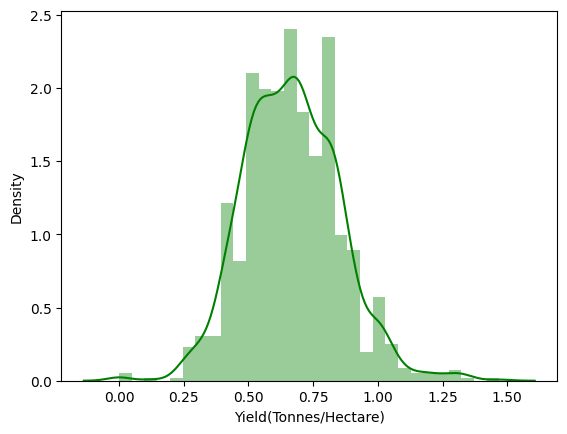

In [39]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [40]:
df['Yield(Tonnes/Hectare)']

0       0.57
1       0.68
4       0.61
5       0.59
6       1.26
        ... 
1717    0.64
1719    0.67
1720    0.48
1722    0.50
1723    0.67
Name: Yield(Tonnes/Hectare), Length: 1146, dtype: float64

In [41]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 1130


In [42]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [43]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [44]:
df['Yield(Tonnes/Hectare)'].skew()

0.1382904864790662

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_26348\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

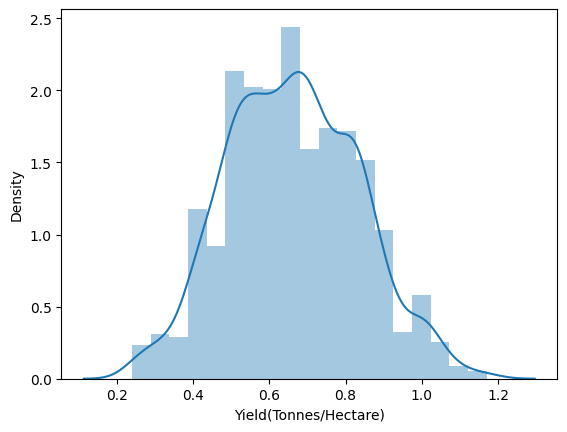

In [45]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [46]:
df.head(10)

,year,stl1_1,stl1_2,stl2_1,stl2_2,stl3_1,stl3_2,stl4_1,stl4_2,swvl1_1,...,tmin_2,countrain_1,countrain_2,u10_3,u10_4,v10_3,v10_4,rh_3,rh_4,Yield(Tonnes/Hectare)
0,2002,23.146511,30.251477,22.478056,29.177739,20.989136,26.135585,20.177291,21.734534,0.202690,...,19.656492,0,2,0.834965,-0.533057,-0.370917,0.033631,52.774485,36.253566,0.57
1,2011,26.238885,31.832131,25.296698,30.701338,23.109665,27.640904,21.574363,23.319502,0.141346,...,21.295177,0,1,0.940389,-0.125049,-1.076249,-0.996146,44.721027,30.629043,0.68
4,2018,28.451819,32.980081,27.589702,32.002171,25.342517,29.174315,23.108070,24.948946,0.143133,...,21.664343,0,2,2.052840,-0.980928,-0.696734,-0.591315,35.919994,36.042663,0.61
5,2018,27.338637,32.539210,26.561048,31.495435,24.517351,28.535817,22.534333,24.138927,0.139280,...,21.723857,0,1,1.193481,-0.199782,-1.167036,-0.410683,41.813591,33.104426,0.59
8,2016,28.708869,34.420744,27.943182,33.307135,25.934999,30.126851,23.959589,25.597975,0.140109,...,23.629411,0,0,0.472617,1.791594,-0.826198,-1.074139,43.032696,26.258772,0.83
9,2010,29.920690,35.860640,28.762169,34.598414,25.819674,30.957230,22.977167,25.381461,0.137760,...,24.032628,0,0,2.001477,1.600252,-0.358593,-0.548082,33.601420,21.659504,1.00
10,2008,27.083991,32.163463,26.124835,30.939133,23.633244,27.589321,21.370445,23.108810,0.141618,...,20.862281,0,0,1.337708,2.136549,-0.541510,-0.926655,41.264342,25.959073,0.75
12,2015,21.346314,26.578952,21.036967,25.764808,20.218834,23.648399,19.428397,20.596381,0.302194,...,18.728619,5,2,0.909632,-0.125558,-0.434363,-0.565146,69.004570,54.892224,0.57
14,2011,27.037780,31.414424,26.143499,30.434310,23.955606,27.752056,22.230556,23.899075,0.143441,...,20.596865,2,2,1.017315,-0.723941,-0.572533,-0.369733,43.188865,37.127111,0.84
15,2010,29.710258,35.699796,28.560469,34.467090,25.671992,30.870637,23.079895,25.390178,0.138440,...,24.022366,0,0,2.240782,1.151555,-0.529955,-0.789040,35.798543,24.289959,0.89


In [47]:
df.shape

(1130, 35)

In [48]:
cat_cols = ['DistrictName', 'year']
# Label encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [49]:
df.head()

,year,stl1_1,stl1_2,stl2_1,stl2_2,stl3_1,stl3_2,stl4_1,stl4_2,swvl1_1,...,tmin_2,countrain_1,countrain_2,u10_3,u10_4,v10_3,v10_4,rh_3,rh_4,Yield(Tonnes/Hectare)
0,3,23.146511,30.251477,22.478056,29.177739,20.989136,26.135585,20.177291,21.734534,0.202690,...,19.656492,0,2,0.834965,-0.533057,-0.370917,0.033631,52.774485,36.253566,0.57
1,9,26.238885,31.832131,25.296698,30.701338,23.109665,27.640904,21.574363,23.319502,0.141346,...,21.295177,0,1,0.940389,-0.125049,-1.076249,-0.996146,44.721027,30.629043,0.68
4,16,28.451819,32.980081,27.589702,32.002171,25.342517,29.174315,23.108070,24.948946,0.143133,...,21.664343,0,2,2.052840,-0.980928,-0.696734,-0.591315,35.919994,36.042663,0.61
5,16,27.338637,32.539210,26.561048,31.495435,24.517351,28.535817,22.534333,24.138927,0.139280,...,21.723857,0,1,1.193481,-0.199782,-1.167036,-0.410683,41.813591,33.104426,0.59
8,14,28.708869,34.420744,27.943182,33.307135,25.934999,30.126851,23.959589,25.597975,0.140109,...,23.629411,0,0,0.472617,1.791594,-0.826198,-1.074139,43.032696,26.258772,0.83


In [50]:
df.shape

(1130, 35)

In [51]:
df.columns

Index(['year', 'stl1_1', 'stl1_2', 'stl2_1', 'stl2_2', 'stl3_1', 'stl3_2',
       'stl4_1', 'stl4_2', 'swvl1_1', 'swvl1_2', 'swvl2_1', 'swvl2_2',
       'swvl3_1', 'swvl3_2', 'swvl4_1', 'swvl4_2', 'ssr_1', 'ssr_2',
       'DistrictName', 'rain_1', 'rain_2', 'tmax_1', 'tmax_2', 'tmin_1',
       'tmin_2', 'countrain_1', 'countrain_2', 'u10_3', 'u10_4', 'v10_3',
       'v10_4', 'rh_3', 'rh_4', 'Yield(Tonnes/Hectare)'],
      dtype='object')

In [52]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [53]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [54]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [55]:
df.shape

(1130, 35)

In [56]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.28, R^2 Score (Test): 0.22
[0.12100788510641325, 0.26368869274168116, 0.29572224133042047, 0.18513845565036546, 0.22500599495731965, 0.2711542961671096, 0.19448477247159768, 0.14105539723662974, 0.2575201979609597, 0.23506316890647094]
Ridge Regression - R^2 Score (Train) : 0.24, R^2 Score (Test): 0.20
[0.12813636421327723, 0.18426321450567418, 0.24453587437962088, 0.14590090574682235, 0.21991954557974203, 0.18117031854940646, 0.24145276537842586, 0.16369178289440978, 0.3508576993251141, 0.1368294324270739]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.34
[0.14355100167444523, 0.5248238252222834, 0.22641830651370298, 0.17332620663047782, 0.2904439515148811, 0.31232221052665743, 0.4948497849326404, 0.474830947165217, 0.2503945071819773, 0.4670762466437103]
Lasso Regression - R^2 Score (Train) : 0.06, R^2 Score (Test): 0.05
[0.0778716556132868, 0.05009276197159929, 0.07742518722939684, -0.04257104258685973, 0.021924512032009513, 0

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.14.0


In [91]:


tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_6.fit(X_train, y_train, epochs=100, verbose=0)

In [92]:
from sklearn.metrics import r2_score
y_pred_train = model_6.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = model_6.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"R^2 score: train and test {r2_train:.2f},{r2_test:.2f}")

8/8 [==============================] - 0s 969us/step
R^2 score: train and test -13220068872284718136550270520757242414953142419456.00,-13791575967168843871180315736798070845890067693568.00


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import r2_score

# Define the architecture of the neural network
model = Sequential([
    Dense(64, input_shape=(10,), activation='relu'),  # Input layer with 10 features
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Calculate R^2 score
y_pred_train = model.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

y_pred_test = model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print("R^2 score: train and test", r2_train,r2_test)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Kanishk Goyal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 10), found shape=(None, 34)


In [ ]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [ ]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [93]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

34


In [94]:
print(columns_to_drop)

['stl2_1', 'stl3_1', 'stl4_2', 'stl2_2', 'stl3_2', 'stl1_1', 'stl3_1', 'stl4_2', 'stl1_2', 'stl3_2', 'stl1_1', 'stl2_1', 'stl4_1', 'stl4_2', 'stl1_2', 'stl2_2', 'stl4_2', 'stl3_1', 'stl4_2', 'stl1_1', 'stl2_1', 'stl3_1', 'stl3_2', 'stl4_1', 'swvl2_1', 'rh_3', 'swvl2_2', 'swvl1_1', 'swvl1_2', 'swvl3_2', 'swvl3_1', 'swvl4_2', 'swvl4_1', 'swvl1_1']


In [95]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_1 : [('stl2_1', 0.9982), ('stl3_1', 0.9718), ('stl4_2', 0.9128)]
stl1_2 : [('stl2_2', 0.9977), ('stl3_2', 0.9671)]
stl2_1 : [('stl1_1', 0.9982), ('stl3_1', 0.9836), ('stl4_2', 0.9266)]
stl2_2 : [('stl1_2', 0.9977), ('stl3_2', 0.9816)]
stl3_1 : [('stl1_1', 0.9718), ('stl2_1', 0.9836), ('stl4_1', 0.9241), ('stl4_2', 0.9623)]
stl3_2 : [('stl1_2', 0.9671), ('stl2_2', 0.9816), ('stl4_2', 0.9446)]
stl4_1 : [('stl3_1', 0.9241), ('stl4_2', 0.9794)]
stl4_2 : [('stl1_1', 0.9128), ('stl2_1', 0.9266), ('stl3_1', 0.9623), ('stl3_2', 0.9446), ('stl4_1', 0.9794)]
swvl1_1 : [('swvl2_1', 0.9556), ('rh_3', 0.9149)]
swvl1_2 : [('swvl2_2', 0.9152)]
swvl2_1 : [('swvl1_1', 0.9556)]
swvl2_2 : [('swvl1_2', 0.9152)]
swvl3_1 : [('swvl3_2', 0.9582)]
swvl3_2 : [('swvl3_1', 0.9582)]
swvl4_1 : [('swvl4_2', 0.9983)]
swvl4_2 : [('swvl4_1', 0.9983)]
rh_3 : [('swvl1_1', 0.9149)]


In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")